In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
def read_csv_file(filename):
    data = np.loadtxt(filename+'.csv',encoding='utf-8-sig')
    col = []
    num = len(data.transpose())
    for i in range(num):
        if num == len(data):
            col1 = data[i]
        else:
            col1 = data[:,i]
        col.append(col1)

    return col

In [9]:
fq = np.loadtxt('gapo4_xray_rmc.fq',encoding='utf-8-sig',usecols=1,skiprows=2)
q = np.loadtxt('gapo4_xray_rmc.fq',encoding='utf-8-sig',usecols=0,skiprows=2)

In [10]:
fq_rescaled = fq*1.3235



In [11]:
print(q)
print(fq)
print(fq_rescaled)

[ 0.7599998  0.7799998  0.7999998 ... 20.8999998 20.9199998 20.9399998]
[-1.44306984 -1.4444406  -1.44362665 ...  0.04826412  0.05607466
  0.06275569]
[-1.90990293 -1.91171714 -1.91063988 ...  0.06387757  0.07421481
  0.08305715]


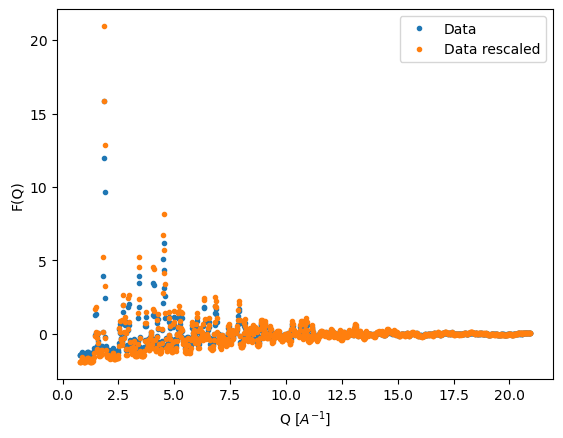

In [12]:
#%matplotlib ipympl
plt.plot(q,fq,'.',label = 'Data')
plt.plot(q,fq_rescaled,'.',label = 'Data rescaled')
plt.legend()
plt.xlabel(r'Q [$A^{-1}$]')
plt.ylabel('F(Q)')
plt.show()

In [15]:
with open('gapo4_xray_sc_rmc.fq', 'w', encoding='utf-8') as f:
    f.write('        1010 \n rmc S(Q)# 105870-pe-GaPO4_0p5_quartz_rt-.int01  \n')
    for i in range(np.size(q)):
        f.write(str(q[i]))
        f.write(' ') 
        f.write(str(fq_rescaled[i]))
        f.write('\n')
    f.close()

In [42]:
q1 = pd.read_csv('gapo4_xray_XFQ1.csv',header = 0,usecols=[0])
fq1_rmc = pd.read_csv('gapo4_xray_XFQ1.csv',header = 0,usecols=[1])
fq1_exp = pd.read_csv('gapo4_xray_XFQ1.csv',header = 0,usecols=[2])
fq1_sc_rmc = pd.read_csv(r'/home/simo/Scrivania/thesis/RMCProfile/ex_6/rescaled/gapo4_xray_XFQ1.csv',header = 0,usecols=[1])



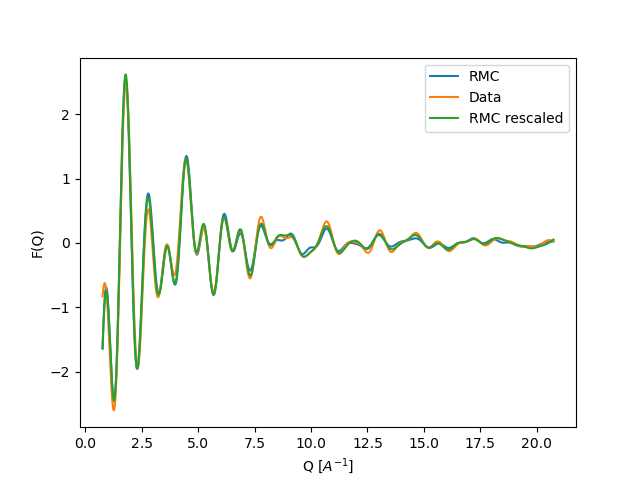

In [45]:
%matplotlib ipympl
plt.plot(q1,fq1_rmc,'-',label = 'RMC')
plt.plot(q1,fq1_exp,'-',label = 'Data')
plt.plot(q1,fq1_sc_rmc,'-',label = 'RMC rescaled')
plt.legend()
plt.xlabel(r'Q [$A^{-1}$]')
plt.ylabel('F(Q)')
plt.show()